<a href="https://colab.research.google.com/github/pasticeta-hub/Investigaci-n-de-operaciones/blob/main/EcuacionCalor_FTCS_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuación del calor 1D con diferencias progresivas (FTCS)

**Problema**  
Resolver numéricamente la ecuación del calor  
$$u_t=u_{xx},\quad 0<x<1,\; t\ge 0,$$  
con $u(0,t)=u(1,t)=0$ y $u(x,0)=\sin(\pi x)$.  
Comparar en $t=0.5$ con la solución exacta $$u(x,t)=e^{-\pi^2 t}\sin(\pi x).$$

**Esquema FTCS**  
$$w_i^{n+1}=w_i^n+r(w_{i+1}^n-2w_i^n+w_{i-1}^n),\quad r=\frac{k}{h^2}.$$

## Funciones auxiliares

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from dataclasses import dataclass

@dataclass
class FTCSResult:
    x: np.ndarray
    w: np.ndarray
    t_reached: float
    r: float
    steps: int

def ftcs_heat(h: float, k: float, t_final: float) -> FTCSResult:
    """
    Resuelve u_t = u_xx en [0,1] con u(0,t)=u(1,t)=0, u(x,0)=sin(pi x).
    Método: FTCS (Forward Time, Centered Space).
    """
    N = int(round(1.0 / h))
    x = np.linspace(0.0, 1.0, N + 1)
    r = k / (h ** 2)
    M = int(round(t_final / k))
    t_reached = M * k
    w = np.sin(np.pi * x)
    w[0] = 0.0; w[-1] = 0.0
    for _ in range(M):
        w_new = w.copy()
        w_new[1:N] = w[1:N] + r * (w[2:N+1] - 2.0 * w[1:N] + w[0:N-1])
        w = w_new
    return FTCSResult(x=x, w=w, t_reached=t_reached, r=r, steps=M)

def exact_solution(x: np.ndarray, t: float) -> np.ndarray:
    return np.exp(- (np.pi ** 2) * t) * np.sin(np.pi * x)

## Parámetros del problema

In [3]:
h = 0.1
T = 0.5
k_values = [0.0005, 0.01]

## Cálculo numérico y comparación tabular en t = 0.5

In [4]:
# Resolver para cada k y crear tabla comparativa
results = {k: ftcs_heat(h, k, T) for k in k_values}
x = results[k_values[0]].x
u_exact = exact_solution(x, T)

import pandas as pd
cols = {"x_i": x, "u(x_i, 0.5)": u_exact}
for k, res in results.items():
    cols[f"w_i, steps={res.steps}  (k={k})"] = res.w
    cols[f"|u - w|  (k={k})"] = np.abs(u_exact - res.w)

df = pd.DataFrame(cols)
df.round(10)

,x_i,"u(x_i, 0.5)","w_i, steps=1000 (k=0.0005)",|u - w| (k=0.0005),"w_i, steps=50 (k=0.01)",|u - w| (k=0.01)
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.1,0.002222,0.002287,0.000064,-30266.270026,30266.272248
2,0.2,0.004227,0.004349,0.000122,60588.054981,60588.050754
3,0.3,0.005818,0.005986,0.000168,-89862.842345,89862.848163
4,0.4,0.006840,0.007037,0.000197,115225.537917,115225.531077
5,0.5,0.007192,0.007399,0.000207,-132328.392814,132328.400006
6,0.6,0.006840,0.007037,0.000197,136478.815915,136478.809075
7,0.7,0.005818,0.005986,0.000168,-124251.368517,124251.374336
8,0.8,0.004227,0.004349,0.000122,94976.581153,94976.576926
9,0.9,0.002222,0.002287,0.000064,-51519.548023,51519.550245


## Gráficas de comparación

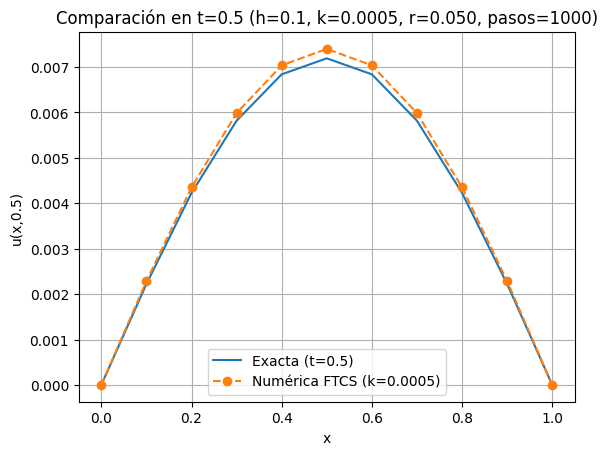

In [5]:
# Figura para k=0.0005 (estable)
res_estable = results[0.0005]
plt.figure()
plt.plot(x, u_exact, label="Exacta (t=0.5)")
plt.plot(x, res_estable.w, marker="o", linestyle="--", label=f"Numérica FTCS (k={0.0005})")
plt.title(f"Comparación en t=0.5 (h={h}, k={0.0005}, r={res_estable.r:.3f}, pasos={res_estable.steps})")
plt.xlabel("x"); plt.ylabel("u(x,0.5)"); plt.grid(True); plt.legend(); plt.show()

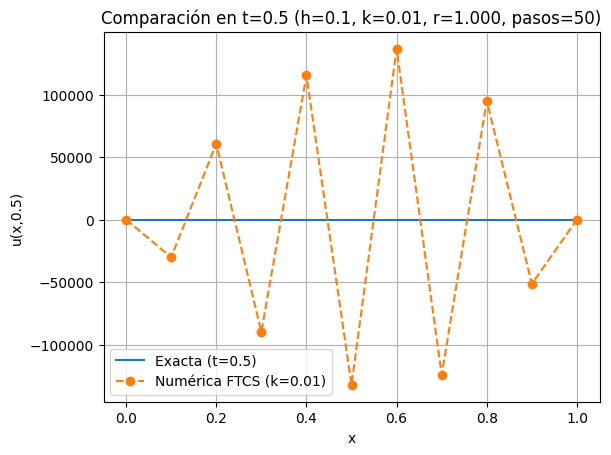

In [6]:
# Figura para k=0.01 (inestable)
res_inestable = results[0.01]
plt.figure()
plt.plot(x, u_exact, label="Exacta (t=0.5)")
plt.plot(x, res_inestable.w, marker="o", linestyle="--", label=f"Numérica FTCS (k={0.01})")
plt.title(f"Comparación en t=0.5 (h={h}, k={0.01}, r={res_inestable.r:.3f}, pasos={res_inestable.steps})")
plt.xlabel("x"); plt.ylabel("u(x,0.5)"); plt.grid(True); plt.legend(); plt.show()

## Comentarios sobre las diferencias al variar $h$ y $k$
- El esquema FTCS es **estable si** $\; r=k/h^2 \le 1/2$.  
- Con $h=0.1$ y $k=0.0005$: $r=0.05\le 0.5$ → **estable**, buena aproximación.  
- Con $h=0.1$ y $k=0.01$: $r=1>0.5$ → **inestable**, la solución explota.  
- Mientras el método sea estable, el error global es $\mathcal{O}(k)+\mathcal{O}(h^2)$: reducir $k$ y/o $h$ mejora la precisión; violar la condición de estabilidad destruye la solución numérica.